# Importing the Libraries

In [1]:
import tensorflow as tf
import pandas as pd 
from keras.utils import to_categorical
import random
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from glob import glob

In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential

# Importing the Dataset


In [3]:
#install kaggle
!pip install -q kaggle

In [4]:
 #import the json file containing the token downloaded from kaggle account
 from google.colab import files
 files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sokainanadi","key":"bf42bc16d1f9f174834988badf07fa65"}'}

In [5]:
#create a kaggle folder
! mkdir ~/.kaggle

In [6]:
# copy the kaggle.json to the folder created
! cp kaggle.json ~/.kaggle/

In [7]:
# permession for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download vipoooool/new-plant-diseases-dataset

 99% 2.68G/2.70G [00:25<00:00, 124MB/s]
100% 2.70G/2.70G [00:25<00:00, 114MB/s]


In [9]:
# in case it is a zip folder
! unzip new-plant-diseases-dataset.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant disea

In [10]:
# Define Constants by re-sizing all the images
IMAGE_SIZE = [224, 224]

train_path = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_path = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [11]:
import pathlib 

data_dir = pathlib.Path(train_path)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names


array(['Apple___Apple_scab', 'Apple___Black_rot',
       'Apple___Cedar_apple_rust', 'Apple___healthy',
       'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew',
       'Cherry_(including_sour)___healthy',
       'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
       'Corn_(maize)___Common_rust_',
       'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy',
       'Grape___Black_rot', 'Grape___Esca_(Black_Measles)',
       'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
       'Orange___Haunglongbing_(Citrus_greening)',
       'Peach___Bacterial_spot', 'Peach___healthy',
       'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy',
       'Potato___Early_blight', 'Potato___Late_blight',
       'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy',
       'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch',
       'Strawberry___healthy', 'Tomato___Bacterial_spot',
       'Tomato___Early_blight', 'Tomato___Late_blight',
   

ValueError: ignored

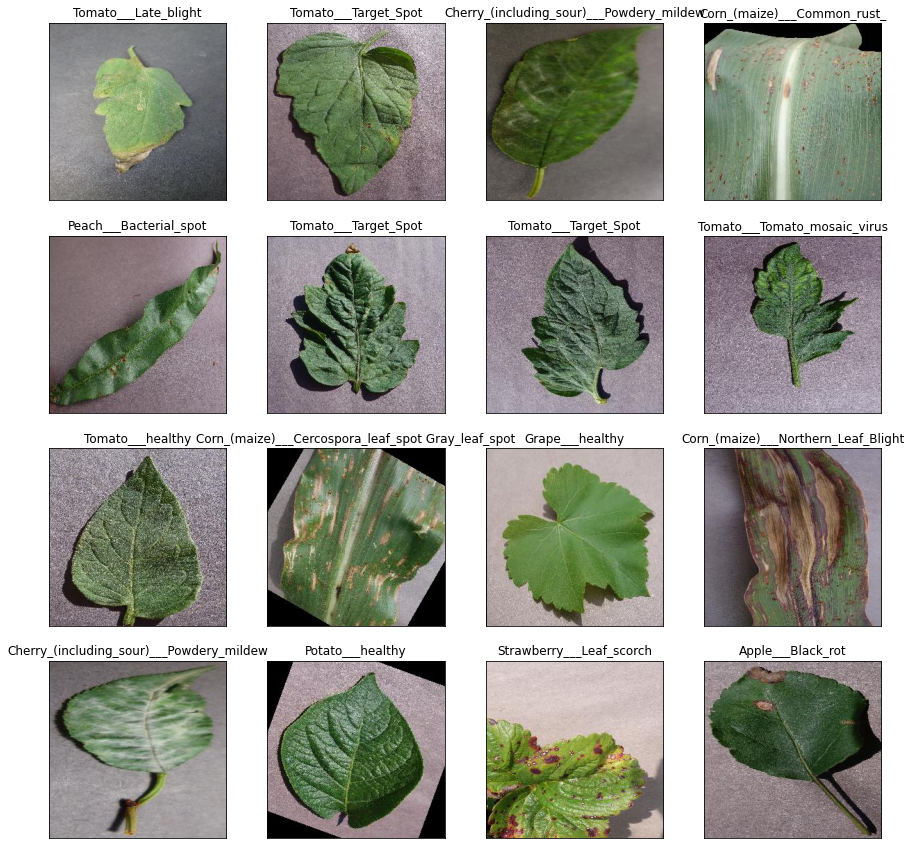

In [14]:
plt.figure(figsize=(15,15))

for i in range(20):
    plt.subplot(4,4,i+1)
    random_class = random.choice(class_names)
    img = plt.imread(random.choice(list(data_dir.glob(random_class+"/*.JPG"))))
    plt.xticks([])
    plt.yticks([])
    plt.title(random_class)
    plt.imshow(img)

## Inception V3

In [15]:
# Import the InceptionV3 model and here we will be using imagenet weights
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


87910968/87910968 [==============================] - 0s 0us/step


In [16]:
# We don't need to train existing weights
for layer in inception.layers:
    layer.trainable = False

## create a trianing apple dateset folder

In [40]:
mkdir "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train_apple"
mkdir "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid_apple"

In [64]:
import pathlib 
train_apple_path = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train_apple'

train_apple = pathlib.Path(train_apple_path)
class_apple_names = np.array(sorted([item.name for item in train_apple.glob("*")]))
class_apple_names

array(['Apple___Apple_scab', 'Apple___Black_rot',
       'Apple___Cedar_apple_rust', 'Apple___healthy'], dtype='<U24')

ValueError: ignored

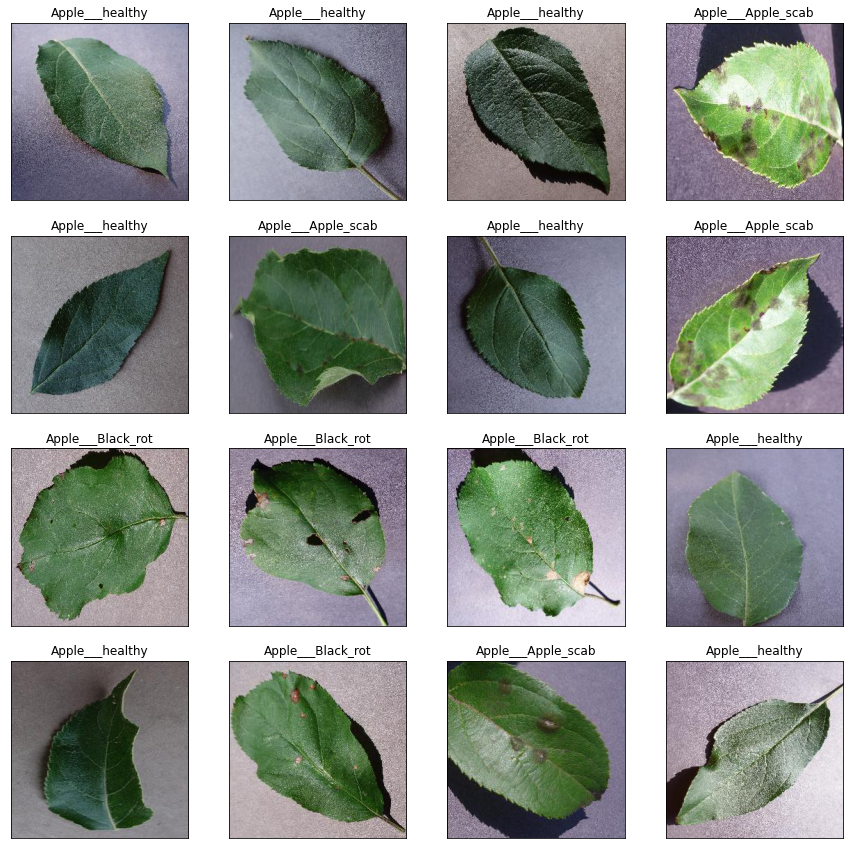

In [66]:
plt.figure(figsize=(15,15))

for i in range(20):
    plt.subplot(4,4,i+1)
    random_class = random.choice(class_apple_names)
    img = plt.imread(random.choice(list(train_apple.glob(random_class+"/*.JPG"))))
    plt.xticks([])
    plt.yticks([])
    plt.title(random_class)
    plt.imshow(img)

In [29]:
# Folders in the Training Set
folders = glob('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple_*')
folders

['/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab',
 '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___healthy',
 '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Black_rot',
 '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Cedar_apple_rust']

In [35]:
mv '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/'   '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train_apple'

In [37]:
mv '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___healthy' '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Black_rot' '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Cedar_apple_rust' '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train_apple'

## create a testing apple dateset folder

In [38]:
# Folders in the Training Set
folders_valid = glob('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple_*')
folders_valid

['/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___Apple_scab',
 '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___healthy',
 '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___Black_rot',
 '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___Cedar_apple_rust']

In [42]:
mv '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___Apple_scab/' '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___healthy' '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___Black_rot' '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___Cedar_apple_rust'  '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid_apple'

## Building the model

In [48]:
# Model layers -> can add more if required
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [49]:
# Create a model object
model = Model(inputs=inception.input, outputs=prediction)

# View the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [50]:
# Defining the cost and model optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [51]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [52]:
# Training Generator
training_set = train_datagen.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train_apple',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 7771 images belonging to 4 classes.


In [53]:
# Testing Generator
test_set = test_datagen.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid_apple',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1943 images belonging to 4 classes.


In [54]:
# fit the model, it will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=3,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/3
243/243 [==============================] - 1138s 5s/step - loss: 1.0765 - accuracy: 0.8694 - val_loss: 0.3241 - val_accuracy: 0.9377
Epoch 2/3
243/243 [==============================] - 1105s 5s/step - loss: 0.3840 - accuracy: 0.9395 - val_loss: 1.0776 - val_accuracy: 0.8904
Epoch 3/3
243/243 [==============================] - 1125s 5s/step - loss: 0.3674 - accuracy: 0.9525 - val_loss: 0.2583 - val_accuracy: 0.9650


# Visualize the model training by plotting Loss Function and Accuracy

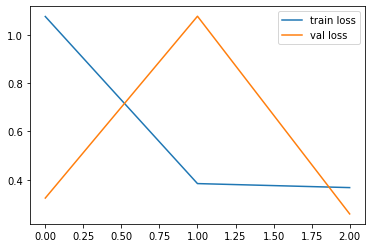

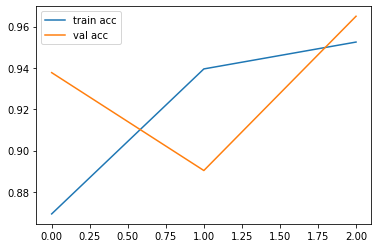

<Figure size 432x288 with 0 Axes>

In [55]:
# Plot the Loss and Accuracy
# Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [56]:
# Saving the model as a h5 file

from tensorflow.keras.models import load_model
model.save('model_inception.h5')

In [57]:
y_pred = model.predict(test_set)
y_pred

61/61 [==============================] - 216s 4s/step


array([[3.18064577e-17, 9.99999940e-01, 6.94777070e-27, 0.00000000e+00],
       [9.99901235e-01, 7.64583025e-16, 9.87329695e-05, 2.95265083e-22],
       [1.66813209e-06, 2.66158482e-23, 4.93005081e-10, 9.99998271e-01],
       ...,
       [1.00000000e+00, 0.00000000e+00, 2.80302107e-28, 1.25239496e-26],
       [1.12118882e-11, 7.07562231e-19, 2.66733207e-12, 1.00000000e+00],
       [1.57363422e-16, 4.92070137e-14, 1.00000000e+00, 1.59557316e-35]],
      dtype=float32)

In [58]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 0, 3, ..., 0, 3, 2])

## Building predectif system

In [59]:
# Model saved with Keras model.save()
MODEL_PATH ='/content/model_inception.h5'

# Load your trained model
model = load_model(MODEL_PATH)

img_path = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid_apple/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335_270deg.JPG'

img = image.load_img(img_path, target_size=(224, 224))

# Preprocessing the image
x = image.img_to_array(img)
# x = np.true_divide(x, 255)
## Scaling
x=x/255
x = np.expand_dims(x, axis=0)

In [62]:
y_pred = model.predict(x)
y_pred=np.argmax(y_pred, axis=1)
if y_pred==0:
    y_pred="Apple_scab"
elif y_pred==1:
    y_pred="Black_rot"
elif y_pred==2:
    y_pred="cedar_apple_rust"
elif y_pred==3:
    y_pred="healthy"
y_pred


1/1 [==============================] - 0s 176ms/step


'Apple_scab'